# Name: Sudarshan Dash

In [1]:
import pandas as pd

columns = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"]
cars = pd.read_table("auto-mpg.data", delim_whitespace=True,names=columns)
print(cars.head(5))

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


# Exploratory Data Analysis

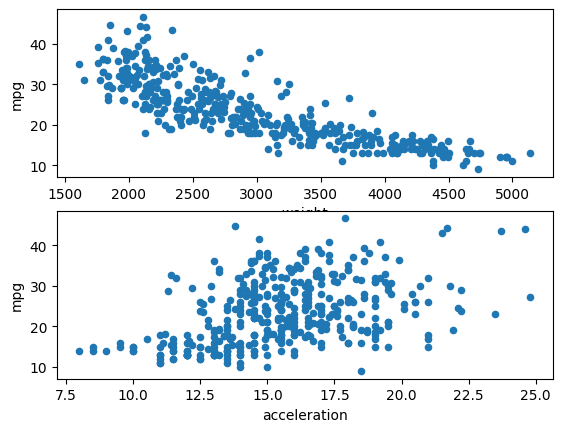

In [3]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
cars.plot('weight','mpg',kind='scatter',ax=ax1)
cars.plot('acceleration','mpg',kind='scatter',ax=ax2)
plt.show()

## The above scatterplot shows a strong negative linear relationship between weight and mpg and a weak positive relationship between acceleration and mpg.

# Fitting the Regression Model

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(cars[["weight"]].values, cars["mpg"])

LinearRegression()

# Making Predictions

In [5]:
predictions=lr.predict(cars[["weight"]])

C:\Users\Admin\anaconda3\envs\new_enviroment_sid3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


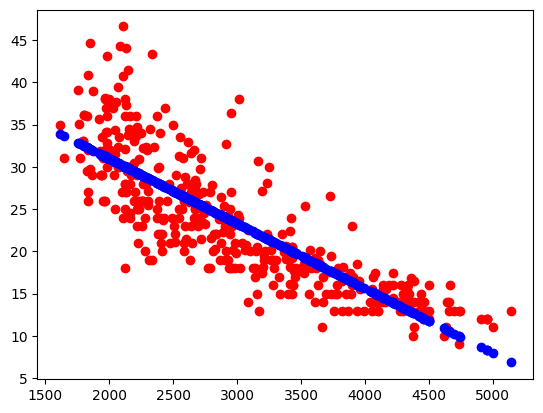

In [6]:
plt.scatter(cars['weight'],cars['mpg'],c="red")
plt.scatter(cars['weight'],predictions,c='blue')
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error as mean_sq_err

mse=mean_sq_err(cars['mpg'],predictions)
print("Mean Squared Error =",mse)

Mean Squared Error = 18.780939734628394


In [8]:
rmse = mse ** 0.5
print("Root Mean Squared Error = ", rmse)

Root Mean Squared Error =  4.333698159150957


In [9]:
filtered_cars = cars[cars["horsepower"] != '?']
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

C:\Users\Admin\AppData\Local\Temp\ipykernel_12948\2728869012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')


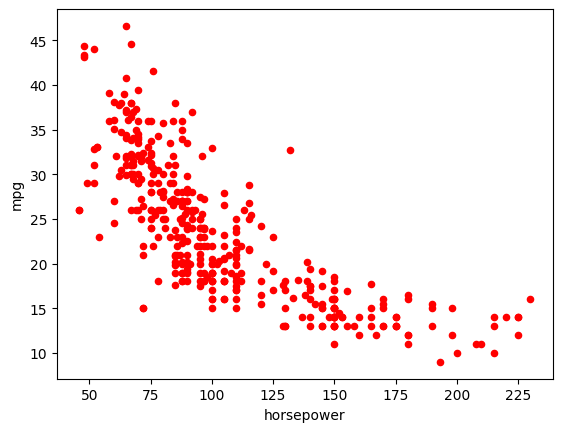

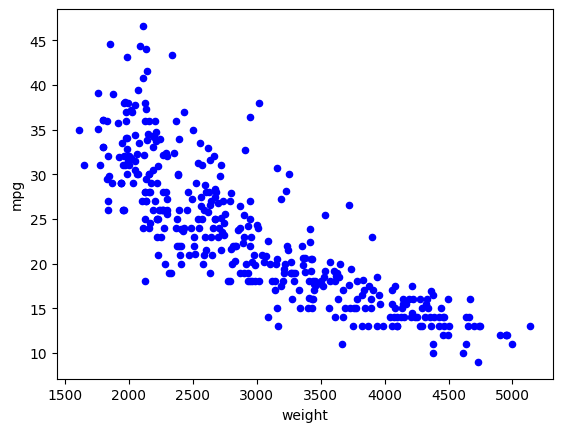

In [10]:
filtered_cars.plot('horsepower','mpg', kind='scatter',c='red')
filtered_cars.plot('weight','mpg', kind='scatter',c='blue')
plt.show()

In [11]:
lr = LinearRegression()
lr.fit(filtered_cars[['horsepower']],filtered_cars[['mpg']])
predictions = lr.predict(filtered_cars[['horsepower']])

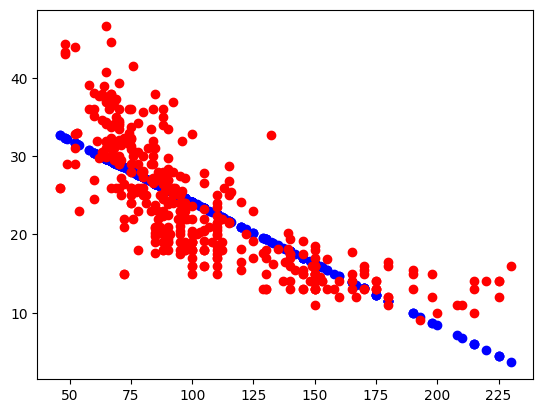

In [12]:
plt.scatter(filtered_cars['horsepower'],predictions,c='blue')
plt.scatter(filtered_cars['horsepower'],filtered_cars['mpg'],c='red')
plt.show()

In [13]:
mse = mean_sq_err(predictions, filtered_cars['mpg'])
rmse = mse ** 0.5
print("Mean Square Error =",mse)
print("Root Mean Square Error =",rmse)

Mean Square Error = 23.943662938603108
Root Mean Square Error = 4.893226230065713
